<h2 align="center"> Linear Regression Benchmark</h2>

# Linear Regression Using Gradient Descent

### This Jupyter Notebook contains a Benchmark of the different approches for solving a Liner Regression Problem

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let $X$ be the independent variable and $Y$ be the dependent variable. We will define a linear relationship between these two variables as follows:

### Linear Regression Equation
---

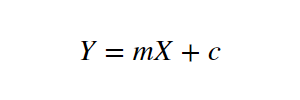

This is the equation for a line, where $m$ is the slope of the line and $c$ is the $y$ intercept. For this exercise we will use this equation to train our model with a given dataset and predict the value of $Y$ for any given value of $X$. Our challenge will be to determine the value of $m$ and $c$, such that the line corresponding to those values is the best fitting line or gives the minimum error.

### Lost Function
---

The loss is the error in our predicted value of $m$ and $c$. Our goal is to minimize this error to obtain the most accurate value of $m$ and $c$.
We will use the $Mean Squared Error Function$ to calculate the loss. There are three steps in this function:

##### 1.- Find the difference between the actual $y$ and predicted $y$ value($y = mx + c$), for a given $x$.
##### 2.- Square this difference.
##### 3.- Find the mean of the squares for every value in $X$.

### Mean Squared Error Equation
---

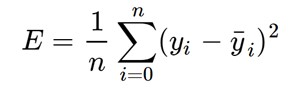

Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ:

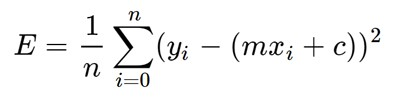

So we Square the Error and find the Mean. Hence the name Mean Squared Error. Now that we have defined the Loss Function, lets get into the interesting part — minimizing it and finding $m$ and $c$.

### The Gradient Descent Algorithm
---

Gradient descent is an iterative optimization algorithm to find the Minimum of a Function. Here that function is our Loss Function.

### Derivative with Respect to $m$
---

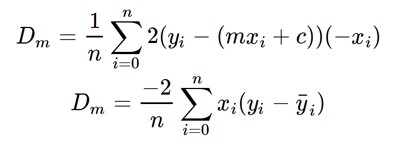

### Derivative with Respect to $c$
---

$Dₘ$ is the value of the partial derivative with respect to $m$. Similarly lets find the partial derivative with respect to $c$, $Dc$ :

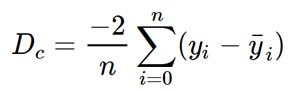

##### 3.- Now we update the current value of $m$ and $c$ using the following equation:

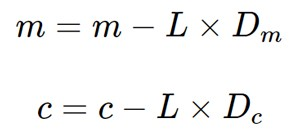

### Implementing the Model
---

#### Making the Imports

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [10]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,9)

### Preprocesing Input Data
---

In [11]:
data = pd.read_csv('data.csv', header = None)
X = data.iloc[: , 0]
Y = data.iloc[: , 1]
data.head()

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [13]:
data.describe()

,0,1
count,100.000000,100.000000
mean,48.958341,72.735051
std,9.746379,16.658187
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,118.591217


### Plotting the Data

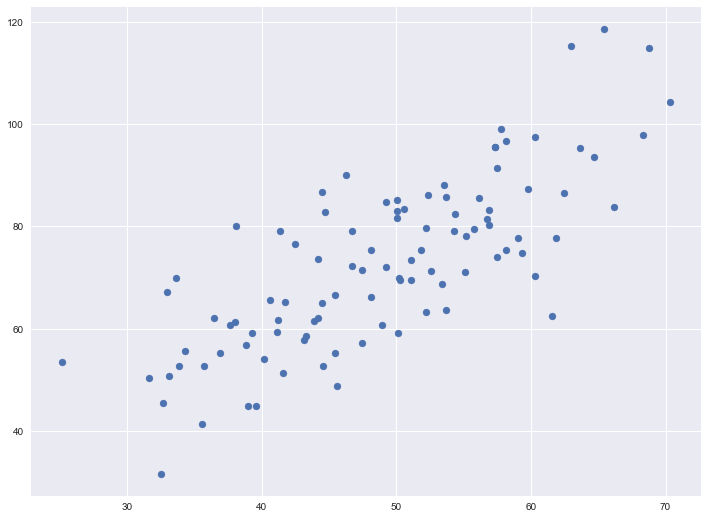

In [14]:
plt.scatter(X, Y)
plt.show()

### Building the Model
---

In [16]:
m = 0
c = 0

L = 0.0001 # Learning Rate
epochs = 1000 # Number of Iterations to Perform Gradient Descent

n = float(len(X)) # Number of Elements in X

### Performing Gradient Descent
---

In [20]:
for i in range(epochs):
    Y_pred = m*X + c # The Current Predicted Value of X
    D_m = (-2/n) * sum(X * (Y - Y_pred)) # Derivative wrt m
    D_c = (-2/n) * sum(Y - Y_pred) # Derivative wrt c
    m = m - L * D_m # Update m
    c = c - L * D_c # Update c

print (m, c)

1.4754171574488348 0.20732694542270091


### Making Predictions
---

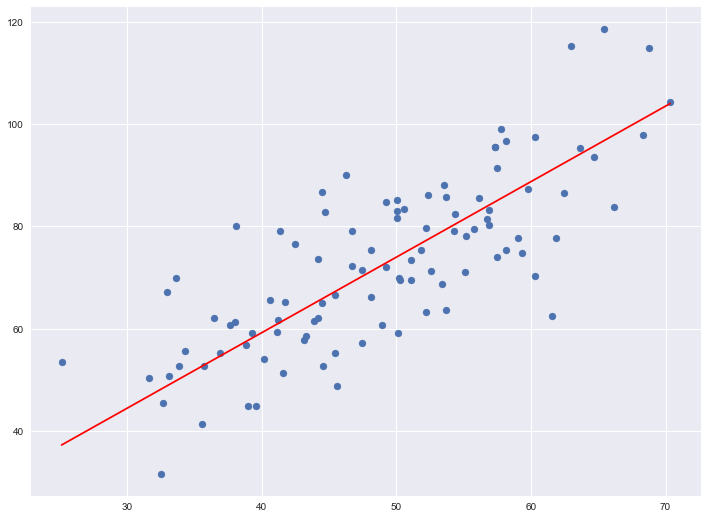

In [23]:
Y_pred = m * X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color = 'red') # Plotting the Regssion Line
plt.show()

# Linear Regression using Least Squares

### Least Squares method

Now that we have determined the loss function, the only thing left to do is minimize it. This is done by finding the partial derivative of $L$, equating it to $0$ and then finding an expression for $m$ and $c$. After we do the math, we are left with these equations:

$m = \frac{\sum_{i=1}^n (x_i - \bar x)(yi - \bar y)}{\sum{i=1}^n (x_i - \bar x)^2}$
---

$$c = \bar y - m\bar x$$
---
Here $\bar x$ is the mean of all the values in the input X and $\bar y$ is the mean of all the values in the desired output Y. This is the Least Squares method. Now we will implement this in python and make predictions.

### Finding the Error
---

Finding the Error
So to minimize the error we need a way to calculate the error in the first place. A loss function in machine learning is simply a measure of how different the predicted value is from the actual value.
Today we will be using the Quadratic Loss Function to calculate the loss or error in our model. It can be defined as:

$$ L(x) = \sum_{i=1}^n (y_i - p_i)^2$$

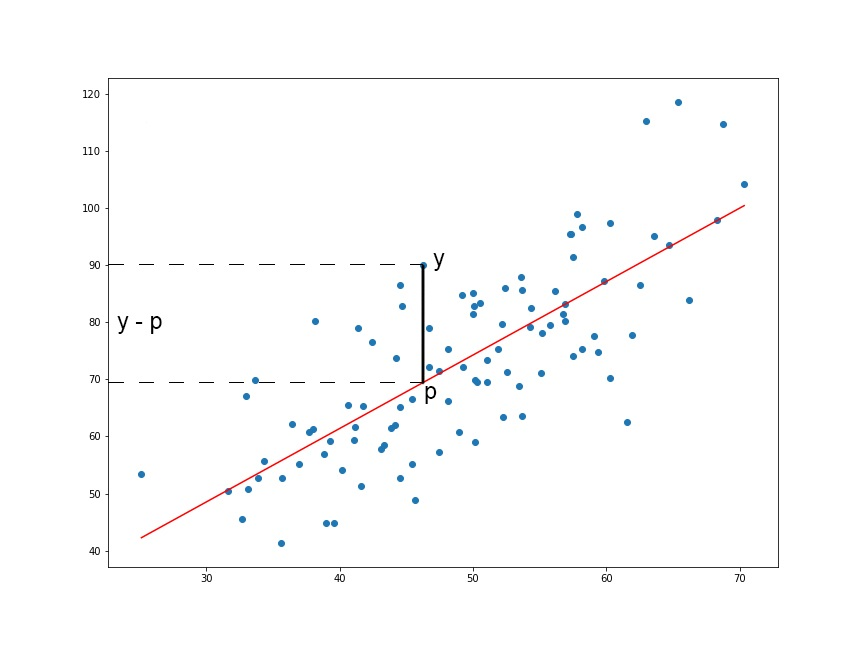

### Implementing the Model
---

#### Making the Imports

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [41]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,9)

### Preprocesing Input Data
---

In [42]:
data = pd.read_csv('data.csv', header = None)
X = data.iloc[: , 0]
Y = data.iloc[: , 1]
data.head()

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


### Plotting the Data

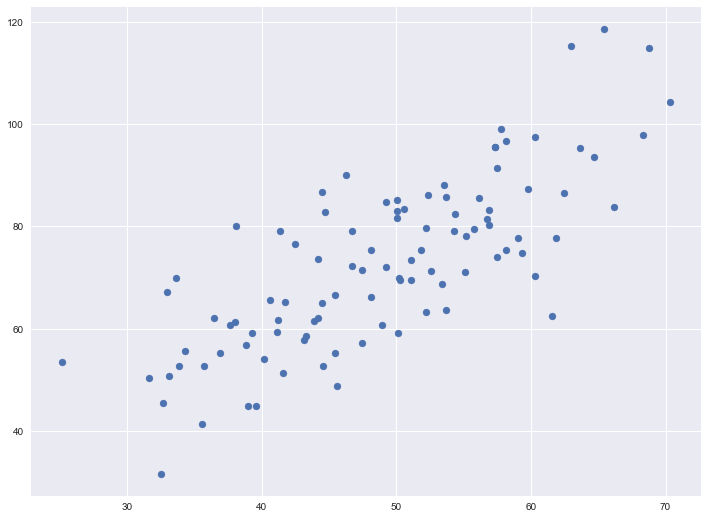

In [43]:
plt.scatter(X, Y)
plt.show()

### Building the Model

In [47]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

num = 0
den = 0
for i in range(len(X)):
    num += (X[i] - X_mean)*(Y[i] - Y_mean)
    den += (X[i] - X_mean)**2
m = num / den
c = Y_mean - m*X_mean

print (m, c)

1.3224310226878686 7.991020985734394


### Making Predictions
---

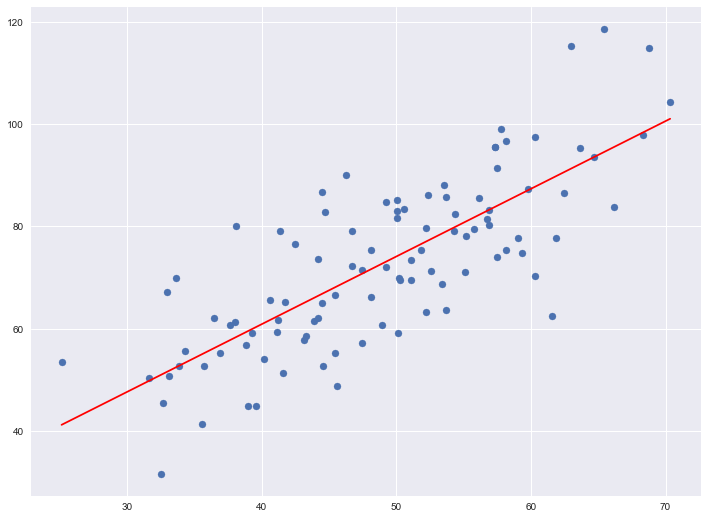

In [48]:
Y_pred = m * X + c
plt.scatter(X, Y) # Actual Values
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color = 'red') # Predicted Values

plt.show()

# Linear Regression using Scikit Learn

### Making the Imports
---

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

### Loading Dataset

In [50]:
data = pd.read_csv('data.csv')
X = data.iloc[:, 0].values.reshape(-1, 1) # Values Converts it Into a Numpy Array
Y = data.iloc[:, 1].values.reshape(-1, 1) # -1 Means that Calculate the Dimension of rows, but Have 1 Column
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

### Visualizing the Data & Predictions

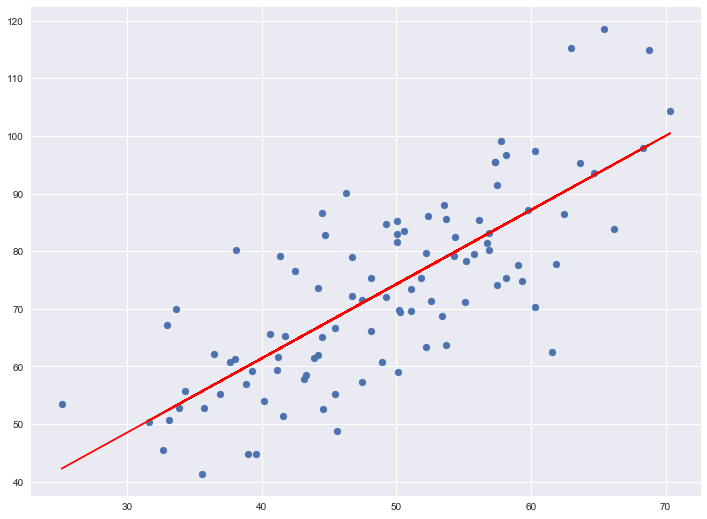

In [51]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

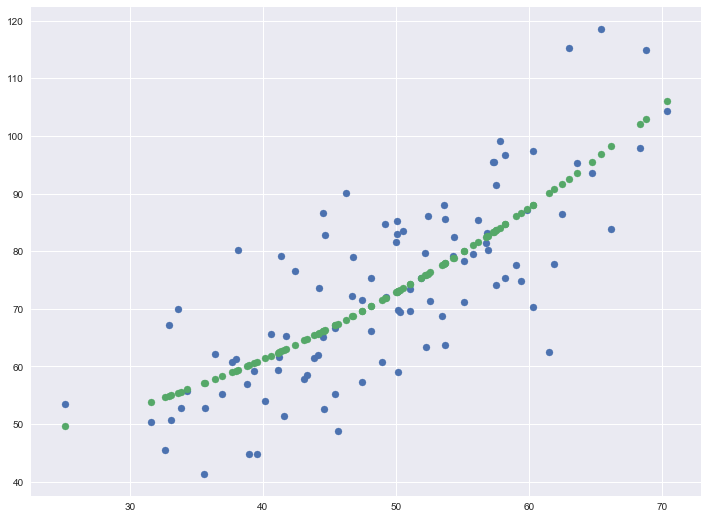

In [52]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(X)
pr.fit(X_poly, Y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
plt.scatter(X, Y)
plt.scatter(X, lin_reg.predict(pr.fit_transform(X)))
plt.show()